In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path
import sys

SRC = Path("__file__").resolve().parents[1]
if str(SRC) not in sys.path:
    sys.path.append(str(SRC))

import config as cfg

In [10]:
# --- 1. Load the Correct Dataset ---

print("Loading AADF traffic data...")
try:
    df = pd.read_csv(cfg.RAW_TRF / "dft_traffic_counts_aadf.csv", low_memory=False)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: The file dft_traffic_counts_aadf.csv was not found.")

    exit()

Loading AADF traffic data...
Dataset loaded successfully.


In [12]:
print("\n=== DATA OVERVIEW ===")
print(f"Shape of the dataset: {df.shape}")
print("\nColumns:")
print(df.info())

# Check for missing values in key columns
print("\nMissing values percentage:")
print(df[['year', 'count_point_id', 'all_motor_vehicles', 'latitude', 'longitude']].isnull().mean() * 100)

# Clean the data: drop rows where essential information is missing
df_clean = df.dropna(subset=['year', 'all_motor_vehicles', 'latitude', 'longitude']).copy()
# Convert year to integer
df_clean['year'] = df_clean['year'].astype(int)


=== DATA OVERVIEW ===
Shape of the dataset: (555880, 34)

Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555880 entries, 0 to 555879
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   count_point_id                555880 non-null  int64  
 1   year                          555880 non-null  int64  
 2   region_id                     555880 non-null  int64  
 3   region_name                   555880 non-null  object 
 4   region_ons_code               555880 non-null  object 
 5   local_authority_id            555880 non-null  int64  
 6   local_authority_name          555880 non-null  object 
 7   local_authority_code          555880 non-null  object 
 8   road_name                     555880 non-null  object 
 9   road_category                 555880 non-null  object 
 10  road_type                     555880 non-null  object 
 11  start_junction_road_name      429456

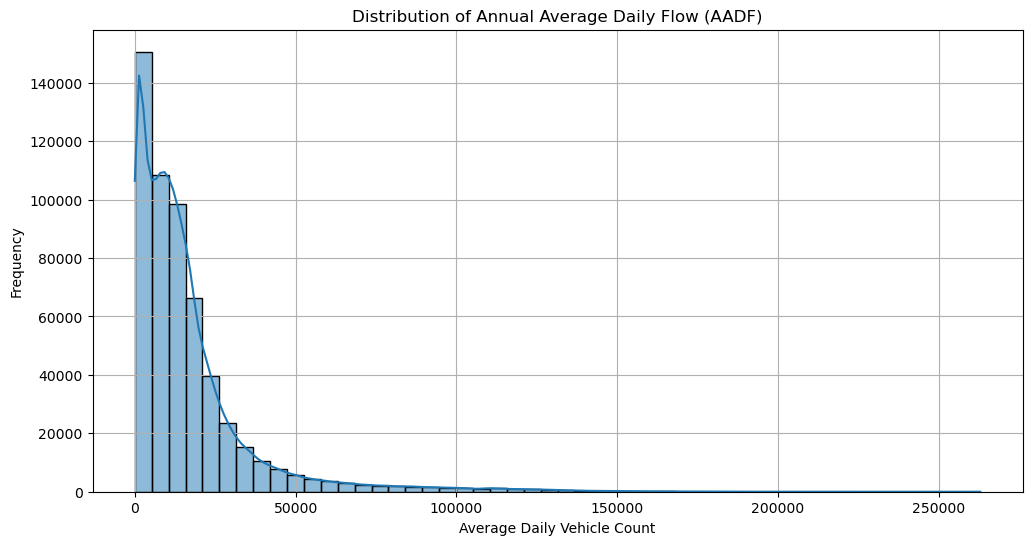


This histogram shows how many sites have low, medium, or high traffic volumes on average.


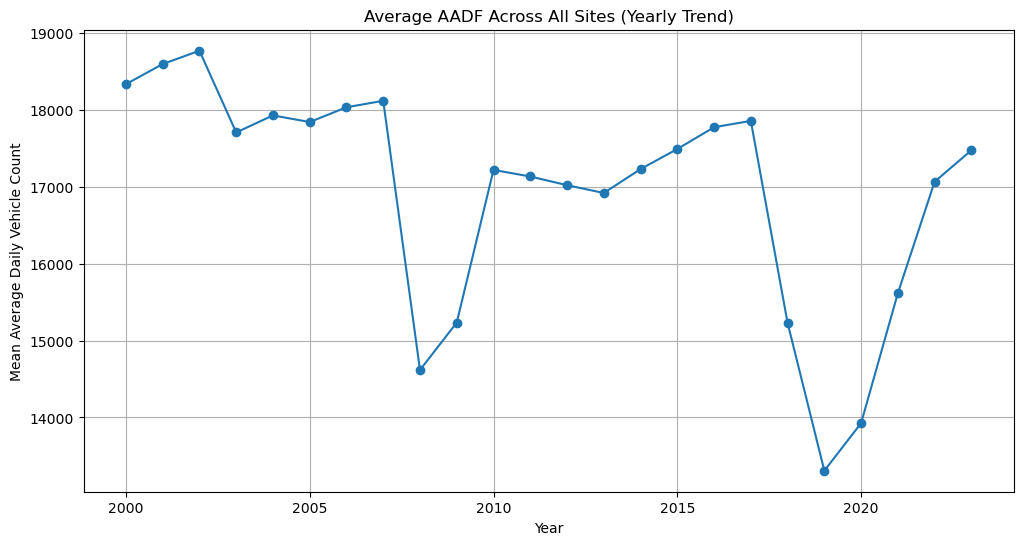


This line chart shows if overall traffic in London is trending up or down over the years.


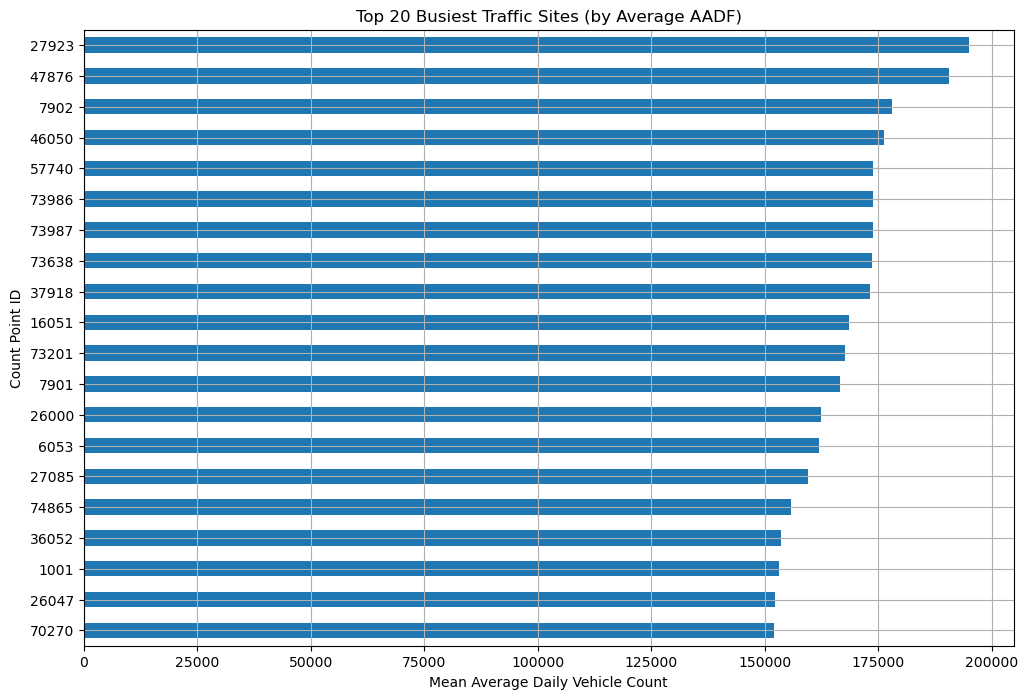


This bar chart identifies the specific road monitoring points with the highest traffic.


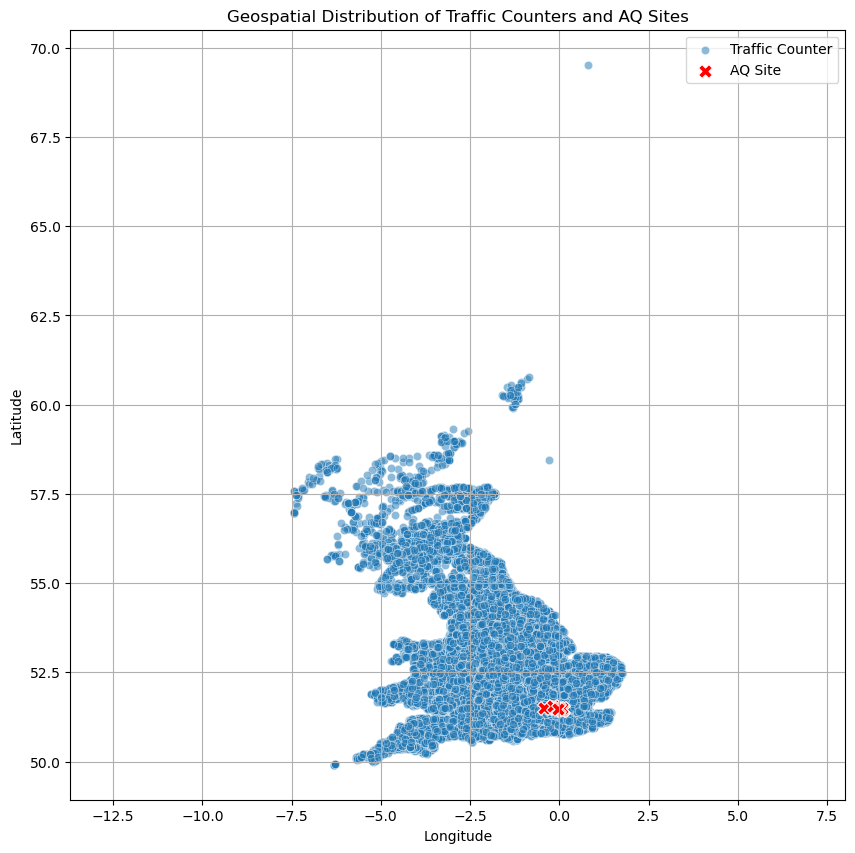


This map shows where the traffic counters are located across London, with AQ sites marked in red.


In [16]:
# Plot 1: Distribution of AADF values
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['all_motor_vehicles'], bins=50, kde=True)
plt.title('Distribution of Annual Average Daily Flow (AADF)')
plt.xlabel('Average Daily Vehicle Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print("\nThis histogram shows how many sites have low, medium, or high traffic volumes on average.")

# Plot 2: Trend of Average Traffic Over Years
yearly_trend = df_clean.groupby('year')['all_motor_vehicles'].mean()

plt.figure(figsize=(12, 6))
yearly_trend.plot(kind='line', marker='o')
plt.title('Average AADF Across All Sites (Yearly Trend)')
plt.xlabel('Year')
plt.ylabel('Mean Average Daily Vehicle Count')
plt.grid(True)
plt.show()
print("\nThis line chart shows if overall traffic in London is trending up or down over the years.")


# Plot 3: Top 20 Busiest Traffic Sites (by average AADF over all years)
top_sites = df_clean.groupby('count_point_id')['all_motor_vehicles'].mean().nlargest(20)

plt.figure(figsize=(12, 8))
top_sites.sort_values().plot(kind='barh')
plt.title('Top 20 Busiest Traffic Sites (by Average AADF)')
plt.xlabel('Mean Average Daily Vehicle Count')
plt.ylabel('Count Point ID')
plt.grid(True)
plt.show()
print("\nThis bar chart identifies the specific road monitoring points with the highest traffic.")

# Plot 4: Geospatial Distribution of Traffic Counters
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=df_clean.drop_duplicates('count_point_id'),
    x='longitude',
    y='latitude',
    alpha=0.5,
    label='Traffic Counter'
)
# add the locations of your 10 LAQN air quality sites
laqn_sites_df = pd.read_csv(cfg.SITES_POLLUTION)
sns.scatterplot(
    data=laqn_sites_df,
    x='longitude',
    y='latitude',
    color='red',
    s=100, # Make the points larger
    marker='X',
    label='AQ Site'
)
plt.title('Geospatial Distribution of Traffic Counters and AQ Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.axis('equal') # Ensure correct aspect ratio
plt.show()
print("\nThis map shows where the traffic counters are located across London, with AQ sites marked in red.")